In [7]:
import os
os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")

import numpy as np
from matplotlib import pyplot as plt
import h5py

from dynapseReservoir.networks.dynapseParameters import dynapseStructure
from dynapseReservoir.networks.reservoirsParameters import generalNetP, r64_1_1_P
from dynapseReservoir.networks.outputParameters import generalOutP
import DYNAPSETools.dynapseOutDecoder as DOD

import matplotlib.pyplot as plot

plt.close("all")


folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/thesis_output_aedat/"

 

In [2]:

# ====================== Define Filter events Core 0
filterCore0 = []
size = generalNetP["sizeTargetEncoding"] 
U0, C0, N = generalNetP["targetEncodingPos"]
targetNeurons = [x for x in range(N, size + N)]
filterCore0 += targetNeurons

# Filter events taking only events that are important for elaboration
U0, C0, N1 = generalNetP["startTriggerPos"]
U0, C0, N2 = generalNetP["stopTriggerPos"]
U0, C0, N3 = generalNetP["endStimulusPos"]
filterCore0 += [N1, N2, N3]

# ====================== Define Filter events Core 1
#%%
size = r64_1_1_P["N_Res"]
U0, C1, N = generalNetP["reservoirStartPos"]
filterCore1 = [x for x in range(N, size + N)]
#%%

# ====================== Apply filter
neuron_id_filter = [filterCore0, filterCore1]


totNeurons = dynapseStructure["nNeuronsPerChip"]
alpha = 0.01 # smoothing parameter

U, C, N = generalNetP["reservoirStartPos"]
startNeuronRes = dynapseStructure["nNeuronsPerCore"] * C + N
stopNeuronRes = startNeuronRes + r64_1_1_P["N_Res"]

    
    

In [3]:
inputRecording1 = 'baselineBias_classificationRes_shortPulse.aedat'
inputRecording2 = 'classificationBias_slowClassificationRes_shortPulse.aedat'

inputRecordingList = [inputRecording1, inputRecording2]


sicMat_dict = {}
for fileName in inputRecordingList:
    
    fileAddress = os.path.join(folderName, fileName)
     
    decEvents = DOD.import_events(fileAddress)

    decEvents = decEvents.normalize()

    decFilteredEvents = decEvents.filter_events(chip_id = U0, core_id = [C0, C1], neuron_id = neuron_id_filter) # Take only events i need

    # ====================== Extract experiments
    experiment = decFilteredEvents.isolate_events_sets(startTriggerNeuron = generalNetP["startTriggerPos"],
                                                            stopTriggerNeuron = generalNetP["stopTriggerPos"],
                                                            maxNumber = None)[0]

    spikeInducedCurrent_allNeurons = experiment.calculate_sic_matrix(totNeurons, alpha, timeBin = generalOutP["timeBin"]*0.1)
    sicMat =  np.array(spikeInducedCurrent_allNeurons[startNeuronRes:stopNeuronRes])
    
    sicMat_dict[fileName] = sicMat
    
    

Read all data

Extracted 1 experiments
Read all data

Extracted 1 experiments


# Visualization

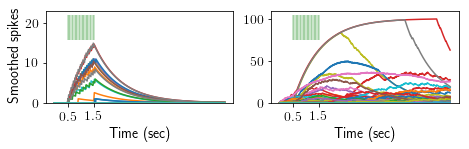

In [70]:
import random
random.seed(1)


plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

width = 6.37
height = width / 1.618 /2

fig = plt.figure()
fig.subplots_adjust(left=.06, bottom=.16, right=.99, top=.97)


ax1 = fig.add_subplot(121)

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Smoothed spikes')
ax1.set_ylim([0, 23])
ax1.set_xticks([0.5, 1.5])
# ax1.axvline(x=0.5, color = 'k', linestyle = ':', linewidth = 5)
# ax1.axvline(x=1.5, color = 'k', linestyle = ':', linewidth = 5)
ax1.eventplot(np.linspace(0.5, 1.5, 20), lineoffsets = 18.7, linelengths = 6.27, linewidths = 0.4, color = 'g')     

ax2 = fig.add_subplot(122)
ax2.set_ylim([0, 110])

ax2.set_xlabel('Time (sec)')
ax2.set_xticks([0.5, 1.5])
ax2.eventplot(np.linspace(0.5, 1.5, 20), lineoffsets = 90, linelengths = 30, linewidths = 0.4, color = 'g')     

# ax2.axvline(x=0.5, color = 'k', linestyle = ':', linewidth = 5)
# ax2.axvline(x=1.5, color = 'k', linestyle = ':', linewidth = 5)


thisSicMat = sicMat_dict[inputRecording1]
bins = np.arange(thisSicMat.shape[1])

randNeuronIndices = random.sample(range(0, 255), 50)

for i in randNeuronIndices:
    ax1.plot(bins * 0.01, sicMat_dict[inputRecording1][i,:])
    ax2.plot(bins * 0.01, sicMat_dict[inputRecording2][i,:])

# plt.subplots_adjust(wspace=0.2)
fig.subplots_adjust(left=.09, bottom=.3, right=.99, top=0.95)
fig.set_size_inches(width, height)



plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_pulse1.pdf', dpi=1200)



In [60]:
23/110 * 30



6.2727272727272725

In [21]:
np.ones([1, 50])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])